### Importing the required librabries needed ###


In [7]:
dataset_link = 'https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset?resource=download'

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

### Data Preprocessing ###

#### Training Image ####

In [2]:
training_variable = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation image preprocessing ###

In [3]:
validation_variable = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


## Building Model ##


In [4]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [5]:
model = Sequential()

In [6]:
## Building  Conventional Layer
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [7]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [8]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Dropout(0.25)) # To avoid overfitting

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(units=1500, activation='relu'))

In [14]:
model.add(Dropout(0.4))

In [15]:
## output layer
model.add(Dense(units=38, activation='softmax'))

## Compiling Model ##

In [16]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Training Model ##


In [18]:
training_accuracy = model.fit(x=training_variable, validation_data=validation_variable, epochs=3)

Epoch 1/3


2024-04-15 19:13:11.590383: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [70295]
	 [[{{node Placeholder/_0}}]]
2024-04-15 19:13:11.590750: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [70295]
	 [[{{node Placeholder/_0}}]]
2024-04-15 19:13:12.058945: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2197/2197 [==============================] - ETA: 0s - loss: 1.3207 - accuracy: 0.6096

2024-04-15 20:03:49.865508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [17572]
	 [[{{node Placeholder/_0}}]]
2024-04-15 20:03:49.865921: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [17572]
	 [[{{node Placeholder/_4}}]]


2197/2197 [==============================] - 3252s 1s/step - loss: 1.3207 - accuracy: 0.6096 - val_loss: 0.5462 - val_accuracy: 0.8298
Epoch 2/3
2197/2197 [==============================] - 3200s 1s/step - loss: 0.4310 - accuracy: 0.8645 - val_loss: 0.2500 - val_accuracy: 0.9199
Epoch 3/3
2197/2197 [==============================] - 3219s 1s/step - loss: 0.2536 - accuracy: 0.9183 - val_loss: 0.1811 - val_accuracy: 0.9414


## Model Evaluation ##

In [19]:
# model evaluation on training set
train_loss,train_acc = model.evaluate(training_variable)

2197/2197 [==============================] - 822s 374ms/step - loss: 0.1066 - accuracy: 0.9650


In [20]:
print(train_loss,train_acc)

0.10656675696372986 0.9650330543518066


In [21]:
# model evaluation on validation set
val_loss,val_acc = model.evaluate(validation_variable)

550/550 [==============================] - 201s 365ms/step - loss: 0.1811 - accuracy: 0.9414


In [22]:
print(val_loss,val_acc)

0.18111729621887207 0.9413840174674988


## Save Model ##

In [23]:
model.save("already_trained_model.keras")

In [24]:
training_accuracy.history

{'loss': [1.3206723928451538, 0.4310222268104553, 0.2535913586616516],
 'accuracy': [0.6096023917198181, 0.8645423054695129, 0.9183156490325928],
 'val_loss': [0.5461707711219788, 0.2500452995300293, 0.18111731112003326],
 'val_accuracy': [0.8297860026359558, 0.919872522354126, 0.9413840174674988]}

In [25]:
# Recording history
import json
with open("training_hist.json", "w") as f:
    json.dump(training_accuracy.history,f)

## Accuracy Visualization ##

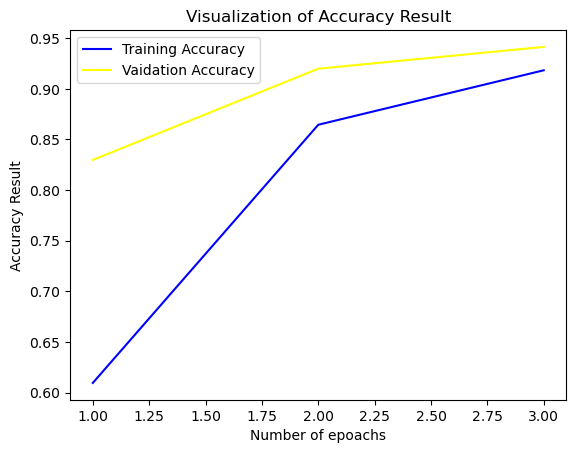

In [27]:
epochs = [i for i in range(1,4)]
plt.plot(epochs,training_accuracy.history['accuracy'], color='blue',label='Training Accuracy')
plt.plot(epochs,training_accuracy.history['val_accuracy'], color='yellow',label='Vaidation Accuracy')
plt.xlabel('Number of epoachs')
plt.ylabel('Accuracy Result')
plt.title('Visualization of Accuracy Result')
plt.legend()

plt.show()

## Some other metrics ##

In [29]:
class_name = validation_variable.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [30]:
test_variable = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [32]:
y_prediction = model.predict(test_variable)
y_prediction,y_prediction.shape

2024-04-15 22:27:22.879560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [17572]
	 [[{{node Placeholder/_0}}]]
2024-04-15 22:27:22.879874: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [17572]
	 [[{{node Placeholder/_4}}]]


550/550 [==============================] - 202s 368ms/step


(array([[9.9679631e-01, 1.2842828e-06, 9.8316931e-08, ..., 3.8776760e-10,
         1.3146131e-10, 4.1186992e-09],
        [9.9515605e-01, 3.3129563e-06, 2.5355126e-07, ..., 6.0298005e-10,
         2.2099973e-09, 6.3086545e-09],
        [1.0000000e+00, 3.8719122e-11, 3.2135930e-10, ..., 1.8842856e-15,
         5.0923667e-15, 1.4755440e-11],
        ...,
        [9.5812967e-12, 9.9421373e-14, 1.6063054e-10, ..., 9.2078959e-13,
         1.9826163e-12, 1.0000000e+00],
        [6.1672922e-10, 4.6251752e-12, 1.1289512e-09, ..., 5.2752521e-11,
         4.2140281e-11, 9.9999952e-01],
        [1.2531404e-11, 5.7694111e-13, 1.3391947e-11, ..., 7.1122974e-13,
         4.2066541e-09, 9.9999797e-01]], dtype=float32),
 (17572, 38))

In [33]:
predict_categories = tf.argmax(y_prediction, axis=1)

In [34]:
predict_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [37]:
true_categories = tf.concat([y for x,y in test_variable],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
y_true = tf.argmax(true_categories,axis=1)

## Precision Recall ##

In [44]:
from sklearn.metrics import classification_report, confusion_matrix


In [48]:
Precision = classification_report(y_true, predict_categories, target_names=class_name)
Precision

'                                                    precision    recall  f1-score   support\n\n                                Apple___Apple_scab       0.92      0.90      0.91       504\n                                 Apple___Black_rot       0.98      0.96      0.97       497\n                          Apple___Cedar_apple_rust       0.95      0.97      0.96       440\n                                   Apple___healthy       0.88      0.96      0.92       502\n                               Blueberry___healthy       0.94      0.97      0.95       454\n          Cherry_(including_sour)___Powdery_mildew       1.00      0.94      0.97       421\n                 Cherry_(including_sour)___healthy       0.92      0.98      0.95       456\nCorn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.90      0.90       410\n                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477\n               Corn_(maize)___Northern_Leaf_Blight       0.90      

In [51]:
# calculating confusion matrix
cm = confusion_matrix(y_true, predict_categories)
cm, cm.shape

(array([[452,   0,   0, ...,   0,   0,   0],
        [  2, 479,   0, ...,   0,   0,   0],
        [  1,   0, 426, ...,   1,   0,   2],
        ...,
        [  0,   0,   0, ..., 480,   0,   0],
        [  0,   0,   0, ...,   0, 434,   0],
        [  0,   0,   0, ...,   0,   0, 475]]),
 (38, 38))

## Confusion Metric Visualization ##

<function matplotlib.pyplot.show(close=None, block=None)>

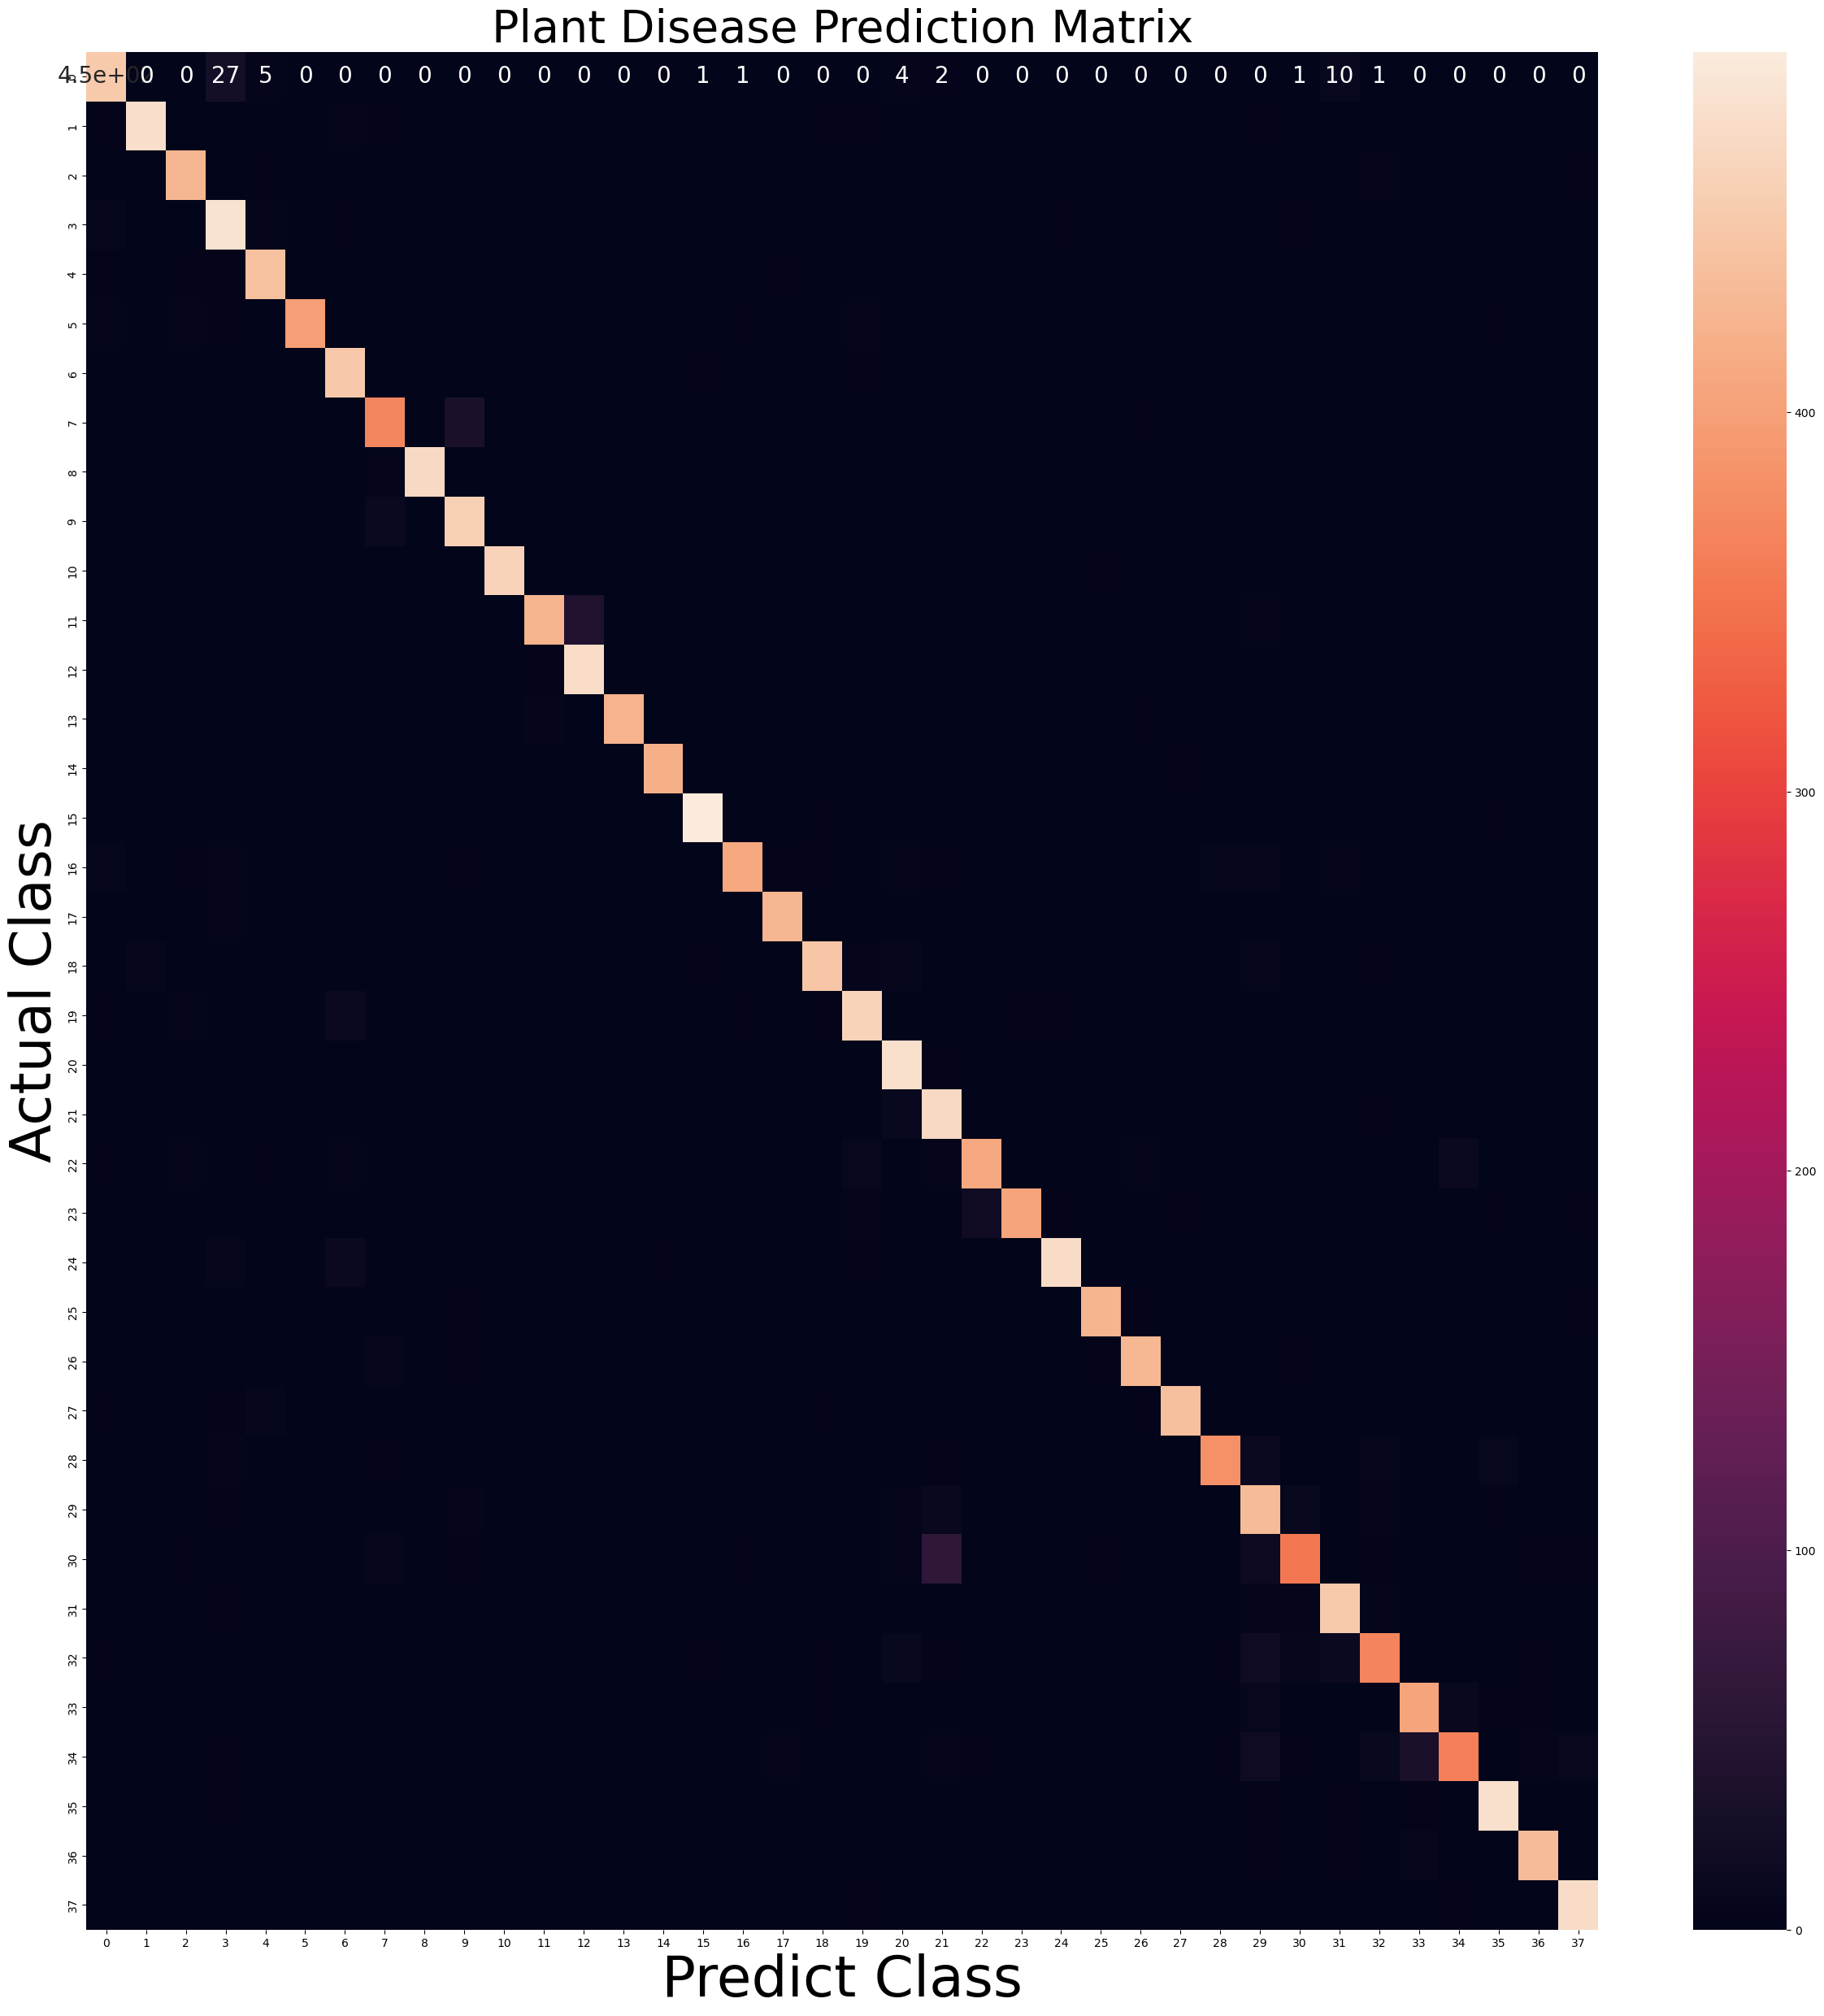

In [54]:
plt.figure(figsize=(30,30))
sns.heatmap(cm, annot=True,annot_kws={'size':20})
plt.xlabel('Predict Class', fontsize=50)
plt.ylabel('Actual Class', fontsize=50)
plt.title('Plant Disease Prediction Matrix', fontsize=40)
plt.show